In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
df = pd.read_csv("D:\cars_clus.csv",sep =',')
df


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0
1,Acura,TL,39.384,19.875,0,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0
2,Acura,RL,8.588,29.725,0,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0
3,Audi,A4,20.397,22.255,0,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0
4,Audi,A6,18.780,23.555,0,33.95,2.8,200,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,Volkswagen,Golf,9.761,11.425,0,14.90,2.0,115,98.9,68.3,163.3,2.767,14.5,26.0,2.278,0
113,Volkswagen,Jetta,83.721,13.240,0,16.70,2.0,115,98.9,68.3,172.3,2.853,14.5,26.0,4.427,0
114,Volkswagen,Passat,51.102,16.725,0,21.20,1.8,150,106.4,68.5,184.1,3.043,16.4,27.0,3.934,0
115,Volkswagen,Cabrio,9.569,16.575,0,19.99,2.0,115,97.4,66.7,160.4,3.079,13.7,26.0,2.259,0


In [57]:
df=df.drop(["partition"],axis=1)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   manufact  117 non-null    object 
 1   model     117 non-null    object 
 2   sales     117 non-null    float64
 3   resale    117 non-null    float64
 4   type      117 non-null    int64  
 5   price     117 non-null    float64
 6   engine_s  117 non-null    float64
 7   horsepow  117 non-null    int64  
 8   wheelbas  117 non-null    float64
 9   width     117 non-null    float64
 10  length    117 non-null    float64
 11  curb_wgt  117 non-null    float64
 12  fuel_cap  117 non-null    float64
 13  mpg       117 non-null    float64
 14  lnsales   117 non-null    float64
dtypes: float64(11), int64(2), object(2)
memory usage: 13.8+ KB


In [59]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }
    )

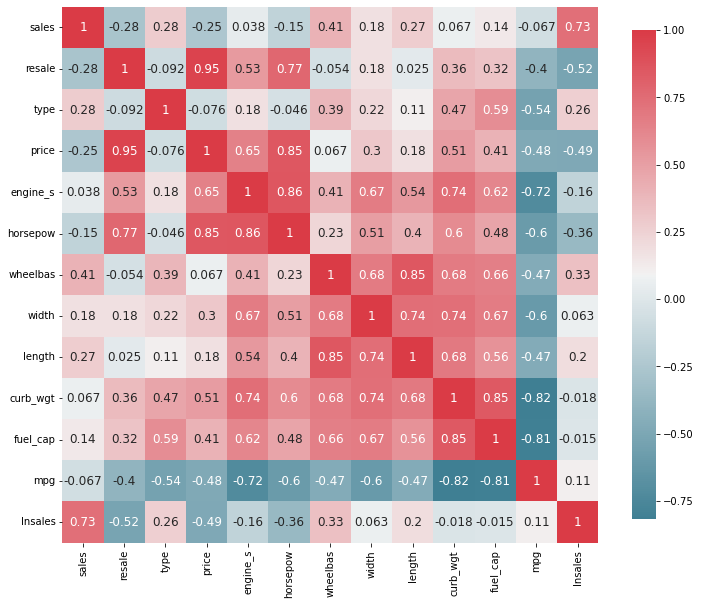

In [60]:
plot_correlation_map( df )

In [61]:
y=df['price']
x=df[['resale','horsepow','sales']]
x_train,x_test,y_train,y_test=train_test_split (x,y,test_size=0.2,random_state=30)


In [62]:
model=LinearRegression()  
model.fit(x_train,y_train)  
predicted=model.predict(x_test)
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 34.68648705270154
R squared 0.8860723067248163


In [63]:
df2=df.drop(["manufact","model"],axis=1)
sc_x = StandardScaler()
sc_x = sc_x.fit_transform(df2)
sc_x = pd.DataFrame(data= sc_x, columns=["sales","resale","type","price","engine_s","horsepow","wheelbas","width","length","curb_wgt","fuel_cap","mpg","lnsales"])

In [64]:
y=sc_x['price']
x=sc_x[['resale','horsepow','sales']]
x_train,x_test,y_train,y_test=train_test_split (x,y,test_size=0.2,random_state=30)


In [65]:
model=LinearRegression()  
model.fit(x_train,y_train)  
predicted=model.predict(x_test)

In [66]:
model=LinearRegression()  
model.fit(x_train,y_train)  
predicted=model.predict(x_test)
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 0.1747405769818464
R squared 0.8860723067248161


In [67]:
x= sc_x['engine_s'].values.reshape(-1,1)
y= sc_x["price"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=40)
lg=LinearRegression()
poly=PolynomialFeatures(degree=2)
x_train_fit = poly.fit_transform(x_train) 
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)
print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  0.7838924163056145
R squared:  0.31620188822191486


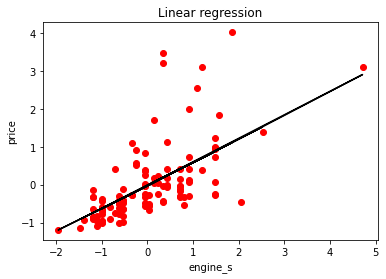

In [68]:
plt.scatter(x, y, color="r")
plt.title("Linear regression")
plt.ylabel("price")
plt.xlabel("engine_s")
plt.plot(x, lg.predict(poly.fit_transform(x)), color="k") 

In [77]:
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
x = df[['price','engine_s']]
y = model.fit_predict(x)


In [78]:
agglomerative=pd.DataFrame(y)
agglomerative

,0
0,0
1,0
2,2
3,0
4,2
...,...
112,0
113,0
114,0
115,0


In [75]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(x)
agglom.labels_

array([2, 2, 3, 2, 5, 1, 5, 3, 2, 2, 5, 2, 3, 3, 5, 4, 4, 2, 2, 2, 3, 4,
       4, 2, 2, 2, 4, 2, 4, 2, 2, 0, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 5, 2,
       5, 4, 2, 4, 4, 2, 2, 2, 4, 4, 4, 5, 4, 2, 2, 5, 3, 1, 3, 3, 4, 2,
       4, 2, 2, 5, 2, 4, 4, 2, 2, 2, 2, 5, 1, 0, 0, 4, 2, 2, 2, 5, 2, 5,
       5, 2, 4, 4, 2, 2, 2, 2, 2, 2, 3, 0, 0, 4, 4, 4, 4, 4, 2, 4, 4, 4,
       2, 1, 4, 4, 2, 2, 4], dtype=int64)

In [79]:
labels=pd.DataFrame(x)
labels

,price,engine_s
0,21.50,1.8
1,28.40,3.2
2,42.00,3.5
3,23.99,1.8
4,33.95,2.8
...,...,...
112,14.90,2.0
113,16.70,2.0
114,21.20,1.8
115,19.99,2.0


In [83]:
from sklearn.cluster import KMeans  
kmeans=KMeans(n_clusters=4, random_state=0)
x = df[['price','engine_s']]
y = kmeans.fit(x)

C:\Users\mosb2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


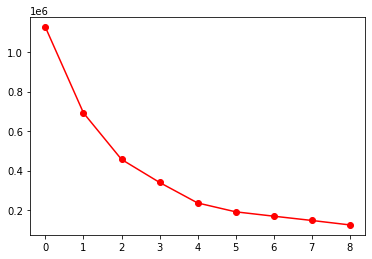

In [86]:
sum_of_sqrdis = []
k = range(1,10)
for k in k :
        km = KMeans(n_clusters=k)
        km = km.fit(df2)
        sum_of_sqrdis.append(km.inertia_)
plt.plot(sum_of_sqrdis, "ro-")

In [87]:
kmeans.predict(x)
print(kmeans.cluster_centers_)

[[26.94247368  3.37631579]
 [71.66916667  4.71666667]
 [16.75922034  2.43220339]
 [42.55764286  4.04285714]]
